In [1]:
import pandas as pd
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from itertools import combinations
import os

[6666.666666666667, 10000.0, 6666.666666666667, 6666.666666666667]


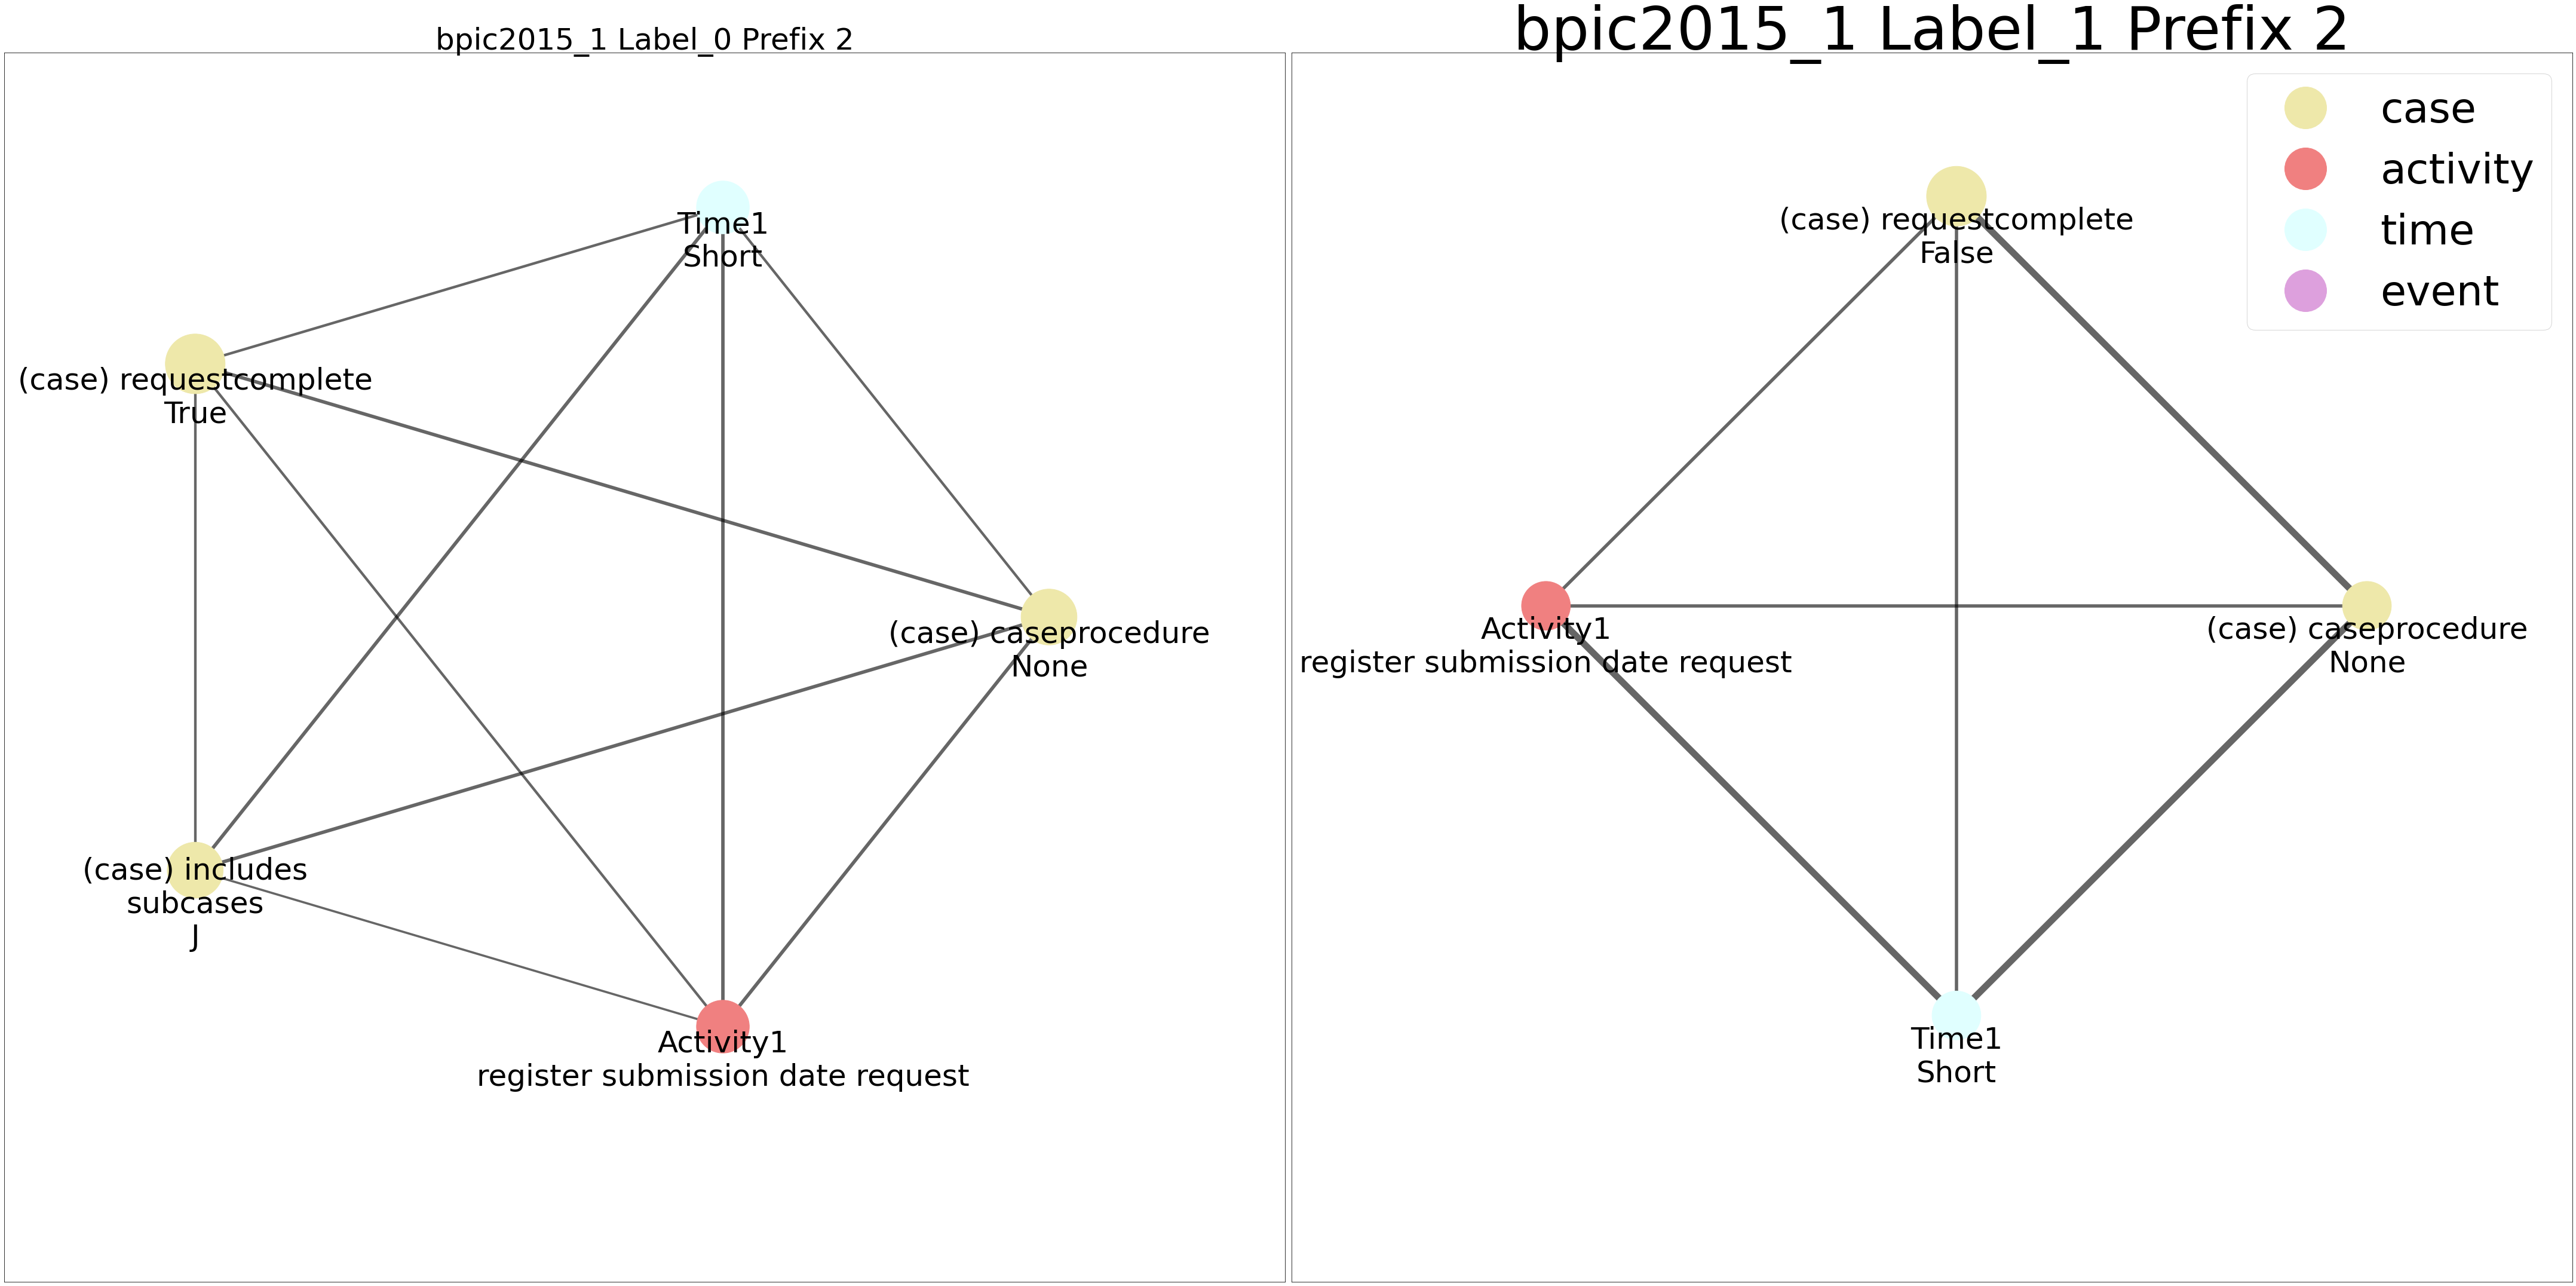

In [155]:
fig, ax = plt.subplots(1, 2, figsize=(60,30))
ax1 = ax[0]
ax2 = ax[1]
prefix = str(2)
graph = nx.Graph()
edges = {}
nodefrequency = {}

filename = '../bpic2015/ltl1/bpic2015_1/ruleresult/way3/threshold0.7/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
with open(filename,'r') as f:
    data = json.load(f)

ante = []
label = 'Label_0'

title = 'bpic2015_1 '+label+' Prefix '+prefix 
# BPIC 2015
case_att = ['(case) includes_subcases', '(case) responsible_actor', '(case) SUMleges', '(case) caseprocedure',
'(case) casestatus', '(case) case_type', '(case) last_phase', '(case) parts', '(case) requestcomplete',
'(case) termname']
event_att = []
act = ['Activity']
time = ['Time']

for d in data[label]:
    for t in data[label][d]:
        ante.append(t.split('/'))

for rules in ante:
    for combis in list(combinations(rules,2)):
        combis = tuple(sorted(combis))
        if combis[0] not in list(nodefrequency.keys()):
            nodefrequency[combis[0]] =1
        else:
            nodefrequency[combis[0]] +=1

        if combis[1] not in list(nodefrequency.keys()):
            nodefrequency[combis[1]] =1
        else:
            nodefrequency[combis[1]] +=1


        if combis not in list(edges.keys()):
            edges[combis] =1
        else:
            edges[combis] +=1

edgeweight=[]
colorset ={'case':'palegoldenrod','activity':'lightcoral','time':'lightcyan','event':'plum'}
for x,y in edges.keys():
    if x.split('_')[0] in case_att or '(case)' in x.split('_')[0]:
        graph.add_node(x,color=colorset['case'],freqeuncy=nodefrequency[x])
    elif 'Activity' in x.split('_')[0]:
        graph.add_node(x,color=colorset['activity'],freqeuncy=nodefrequency[x])
    elif 'Time' in x.split('_')[0]:
        graph.add_node(x,color=colorset['time'],freqeuncy=nodefrequency[x])
    else:
        graph.add_node(x,color=colorset['event'],freqeuncy=nodefrequency[x])

    if y.split('_')[0] in case_att:
        graph.add_node(y,color=colorset['case'],freqeuncy=nodefrequency[y])
    elif 'Activity' in y.split('_')[0]:
        graph.add_node(y,color=colorset['activity'],freqeuncy=nodefrequency[y])
    elif 'Time' in y.split('_')[0]:
        graph.add_node(y,color=colorset['time'],freqeuncy=nodefrequency[y])
    else:
        graph.add_node(y,color=colorset['event'],freqeuncy=nodefrequency[y])

    graph.add_edge(x,y,weight=edges[(x,y)])
    edgeweight.append(edges[(x,y)])

edgeweight = [50*x/sum(edgeweight) for x in edgeweight]
pos = nx.shell_layout(graph)
for t in pos.keys():
    pos[t] = pos[t]*0.9
# margin=0.33
# fig.subplots_adjust(margin, margin, 1.-margin, 1.-margin)
# ax.axis('equal')
node_size = [x[1] for x in graph.nodes.data('freqeuncy')]

node_size = [10000*x/max(node_size) for x in node_size]
nx.draw_networkx_nodes(graph,pos,ax=ax1,font_size=10,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_edges(graph,pos,ax=ax1,width=edgeweight,alpha=0.6,len=0.7)
for p in pos:  # raise text positions
    pos[p][1] -= 0.07

labels ={}


for k in graph.nodes:
    labels[k] = k.replace('_','\n')
nx.draw_networkx_labels(graph, pos,ax=ax1,labels=labels,font_size=50)

ax1.set_title(title,fontsize=50)
fig.subplots_adjust()
cut = 1.5
xmin =cut*min(xx for xx,yy in pos.values()) 
ymin= cut*min(yy for xx,yy in pos.values())
xmax= cut*max(xx for xx,yy in pos.values())
ymax= cut*max(yy for xx,yy in pos.values())

ax1.set_xlim(xmin,xmax)
ax1.set_ylim(ymin,ymax)

prefix = str(2)
graph = nx.Graph()
edges = {}
nodefrequency = {}

filename = '../bpic2015/ltl1/bpic2015_1/ruleresult/way3/threshold0.7/Summarized_Rule_prefix'+str(prefix)+'_rnd0.json'
with open(filename,'r') as f:
    data = json.load(f)

ante = []
label = 'Label_1'
title = 'bpic2015_1 '+label+' Prefix '+prefix 

# BPIC 2015
case_att = ['(case) includes_subcases', '(case) responsible_actor', '(case) SUMleges', '(case) caseprocedure',
'(case) casestatus', '(case) case_type', '(case) last_phase', '(case) parts', '(case) requestcomplete',
'(case) termname']
event_att = []
act = ['Activity']
time = ['Time']

for d in data[label]:
    for t in data[label][d]:
        ante.append(t.split('/'))

for rules in ante:
    for combis in list(combinations(rules,2)):
        combis = tuple(sorted(combis))
        if combis[0] not in list(nodefrequency.keys()):
            nodefrequency[combis[0]] =1
        else:
            nodefrequency[combis[0]] +=1

        if combis[1] not in list(nodefrequency.keys()):
            nodefrequency[combis[1]] =1
        else:
            nodefrequency[combis[1]] +=1


        if combis not in list(edges.keys()):
            edges[combis] =1
        else:
            edges[combis] +=1

edgeweight=[]
colorset ={'case':'palegoldenrod','activity':'lightcoral','time':'lightcyan','event':'plum'}
for x,y in edges.keys():
    if x.split('_')[0] in case_att:
        graph.add_node(x,color=colorset['case'],freqeuncy=nodefrequency[x])
    elif 'Activity' in x.split('_')[0]:
        graph.add_node(x,color=colorset['activity'],freqeuncy=nodefrequency[x])
    elif 'Time' in x.split('_')[0]:
        graph.add_node(x,color=colorset['time'],freqeuncy=nodefrequency[x])
    else:
        graph.add_node(x,color=colorset['event'],freqeuncy=nodefrequency[x])

    if y.split('_')[0] in case_att:
        graph.add_node(y,color=colorset['case'],freqeuncy=nodefrequency[y])
    elif 'Activity' in y.split('_')[0]:
        graph.add_node(y,color=colorset['activity'],freqeuncy=nodefrequency[y])
    elif 'Time' in y.split('_')[0]:
        graph.add_node(y,color=colorset['time'],freqeuncy=nodefrequency[y])
    else:
        graph.add_node(y,color=colorset['event'],freqeuncy=nodefrequency[y])

    graph.add_edge(x,y,weight=edges[(x,y)])
    edgeweight.append(edges[(x,y)])

edgeweight = [50*x/sum(edgeweight) for x in edgeweight]
pos = nx.shell_layout(graph,scale=1)

node_size = [x[1] for x in graph.nodes.data('freqeuncy')]

node_size = [10000*x/max(node_size) for x in node_size]
print(node_size)
nx.draw_networkx_nodes(graph,pos,ax=ax2,font_size=10,node_color=[x[1] for x in graph.nodes.data('color')],node_size=node_size)
nx.draw_networkx_edges(graph,pos,ax=ax2,width=edgeweight,alpha=0.6,len=0.7)
for p in pos:  # raise text positions
    pos[p][1] -= 0.1

labels ={}


for k in graph.nodes:
    labels[k] = k.replace('_','\n')
nx.draw_networkx_labels(graph, pos,ax=ax2,labels=labels,font_size=50,with_labels = True)

ax2.set_title(title,fontsize=100)
fig.subplots_adjust()

cut = 1.5
xmin =cut*min(xx for xx,yy in pos.values()) 
ymin= cut*min(yy for xx,yy in pos.values())
xmax= cut*max(xx for xx,yy in pos.values())
ymax= cut*max(yy for xx,yy in pos.values())

ax2.set_xlim(xmin*1.08,xmax)
ax2.set_ylim(ymin,ymax)

colors = ["g", "w"]
texts = ["Green Data Description", "RedData Description"]
patches = [ plt.plot([],[], marker="o", ms=70, ls="", mec=None, color=colorset[i], 
            label="{:s}".format(i) )[0]  for i in colorset.keys() ]
plt.legend(handles=patches, 
           loc='upper right', fontsize=70)


try:
    os.makedirs('./sepsis/rule1/ruleresult/way3/withoutsparse_0.4/saved figures')
except:
    pass

plt.tight_layout()
plt.savefig('./bpic2015_1network.pdf')
plt.show()



{'1': array([1.        , 0.04688734]), '2': array([-1.        , -0.04688734])}
1.4999999999999998
(-1.0999999999999996, 1.0999999999999999)


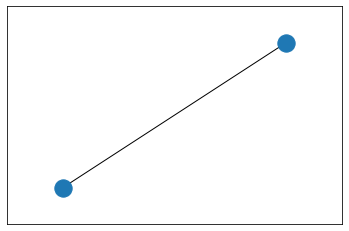

In [111]:
graph = nx.Graph()
graph.add_edge('1','2')
pos = nx.spring_layout(graph)

cut = 1.5
xmin =cut*min(xx for xx,yy in pos.values()) 
ymin= cut*min(yy for xx,yy in pos.values())
xmax= cut*max(xx for xx,yy in pos.values())
ymax= cut*max(yy for xx,yy in pos.values())

nx.draw_networkx_nodes(graph,pos)
nx.draw_networkx_edges(graph,pos)
print(pos)
print(xmax)
print(plt.gca().get_xlim())
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.show()
